# Q3

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('face.jpg')[:,:,::-1]

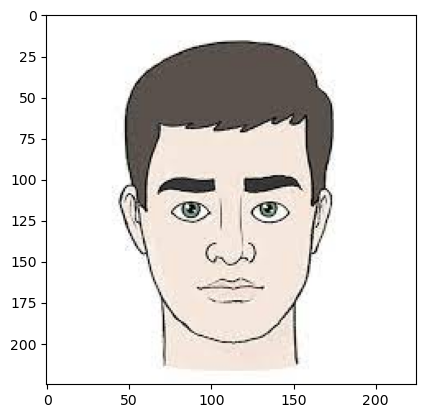

In [3]:
# image[118, 170] = [255, 0, 0]  # for fimding seeds
plt.imshow(image)

In [4]:
def segment(image):
    segmented_image = None
    ### 
    ### your implementation
    
    # region_growth
    segmented_image = image.copy()
    rows = image.shape[0]
    cols = image.shape[1]

    seeds = [(100, 115), (40, 105), (208, 110), (103, 85), (103, 135), (120, 95), (120, 128), (115, 48), (118, 170)]
    seed_thresholds = [18 ,30, 16, 20, 20, 25, 25, 25, 25]
    colors = [[255, 0, 0], [0, 255, 0], [0, 0, 255], [0, 255, 255], [0, 255, 255], [255, 255, 0], [255, 255, 0], [255, 0, 255], [255, 0, 255]]
    for i in range(len(seeds)):
        grow_seed(seeds[i], segmented_image, image.copy(), rows, cols, seed_thresholds[i], colors[i])
    ### 
    return segmented_image

def compute_diff(abs_diff_from_seed):
    red_channel_diff = abs_diff_from_seed[:,:,0]
    blue_channel_diff = abs_diff_from_seed[:,:,1]
    green_channel_diff = abs_diff_from_seed[:,:,2]
    # we could change to grayscale instead
    return (red_channel_diff + blue_channel_diff + green_channel_diff) / 3

def find_connected_component(diff_from_seed, result, seed, max_diff, rows, cols, color):
    quque = []
    visited = np.full((rows, cols), False)
    quque.append(seed)
    visited[seed[0], seed[1]] = True
    result[seed[0], seed[1]] = color
    while len(quque) != 0:
        pixel = quque.pop()
        result[pixel[0], pixel[1]] = color
        for i in range(-1, 2):
            for j in range(-1, 2):
                if (i == 0 and j == 0) or (pixel[0] + i < 0 or pixel[0] + i >= rows or pixel[1] + j < 0 or pixel[1] + j >= cols):
                    continue
                neighbor = (pixel[0] + i, pixel[1] + j)
                if (diff_from_seed[neighbor[0], neighbor[1]] < max_diff and visited[neighbor[0], neighbor[1]] == False):
                    quque.append(neighbor)
                    visited[neighbor[0], neighbor[1]] = True

def grow_seed(seed, segmented_image, image, rows, cols, seed_threshold, color):
    seed_color = image[seed[0], seed[1]]
    seed_color = np.float64(seed_color)

    # image = np.float64(cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb))
    image = np.float64(image)

    diff_from_seed = image - seed_color
    abs_diff_from_seed = np.abs(diff_from_seed)
    computed_diff = compute_diff(abs_diff_from_seed)
    find_connected_component(computed_diff, segmented_image, seed, seed_threshold, rows, cols, color)


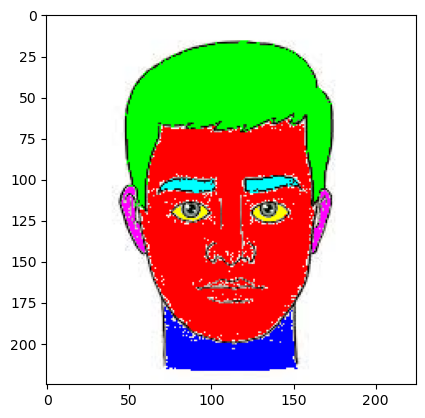

In [5]:
segmented_image = segment(image)
plt.imshow(segmented_image)